<a href="https://colab.research.google.com/github/Clarice-Satiko-Aoto/Studying/blob/main/segmentacao_cliente_olist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Falconi/Alura/segmentacao_cliente_olist/BancoDeDados/BancoDeDados.csv'

df=pd.read_csv(path,
               parse_dates=['horario_pedido'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116581 entries, 0 to 116580
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   amostra               116581 non-null  int64         
 1   id_cliente            116581 non-null  object        
 2   id_unico_cliente      116581 non-null  object        
 3   item_id               116581 non-null  int64         
 4   cep_cliente           116581 non-null  int64         
 5   cidade_cliente        116581 non-null  object        
 6   estado_cliente        116581 non-null  object        
 7   id_pedido             116581 non-null  object        
 8   status_pedido         116581 non-null  object        
 9   horario_pedido        116581 non-null  datetime64[ns]
 10  pedido_aprovado       116567 non-null  object        
 11  pedido_entregador     115368 non-null  object        
 12  pedido_entregue       114066 non-null  object        
 13 

In [ ]:
df.head()

,amostra,id_cliente,id_unico_cliente,item_id,cep_cliente,cidade_cliente,estado_cliente,id_pedido,status_pedido,horario_pedido,...,pagamento_sequencial,pagamento_tipo,pagamento_prestacoes,pagamento_valor,review,categoria,categoria_ingles,cep_vendedor,cidade_vendedor,estado_vendedor
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,1,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,1,credit_card,2,146.87,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
1,1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,1,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
2,2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,2,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,...,1,credit_card,1,275.79,1,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
3,3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,1,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,...,1,credit_card,7,140.61,3,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP
4,4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,1,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,...,1,credit_card,10,137.58,4,moveis_escritorio,office_furniture,8577,itaquaquecetuba,SP


função para plotar o gráfico de barras

In [ ]:
def plot_perc(st,df=df):
  plt.figure(figsize=(20,6))
  g=sns.countplot(x=st, 
                  data=df, 
                  orient='h',
                  # order=st,
                  color='lightseagreen'
                  )
  g.set_title(f'Qde vendas por {st}')

  sizes=[]
  for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x() + p.get_width()/1.5,
           height + 200,
           "{:1.2f}%".format(height/116581 * 100),
           ha='center', va='bottom', fontsize=12)
    g.set_ylim(0, max(sizes) * 1.1)

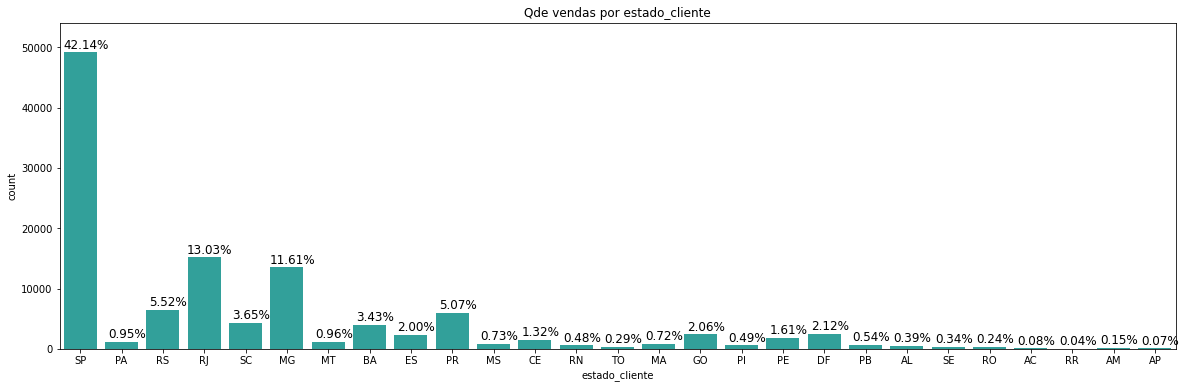

In [ ]:
plot_perc('estado_cliente')

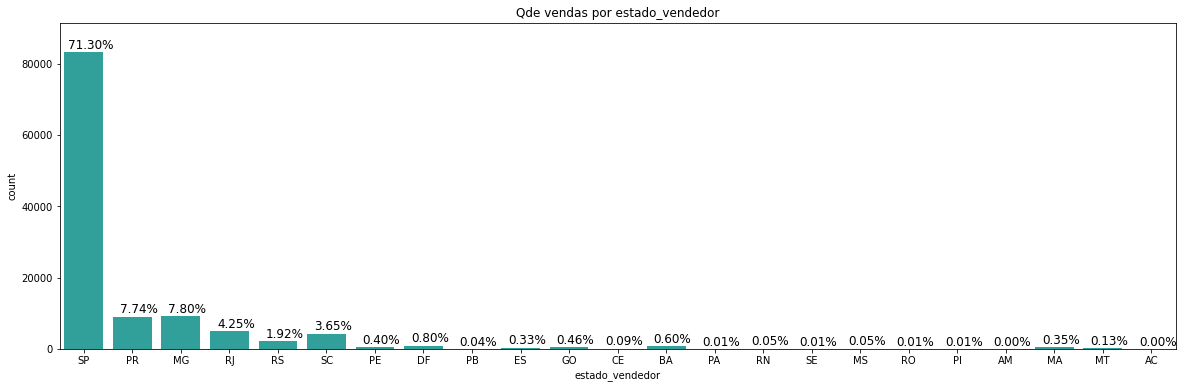

In [ ]:
plot_perc('estado_vendedor')

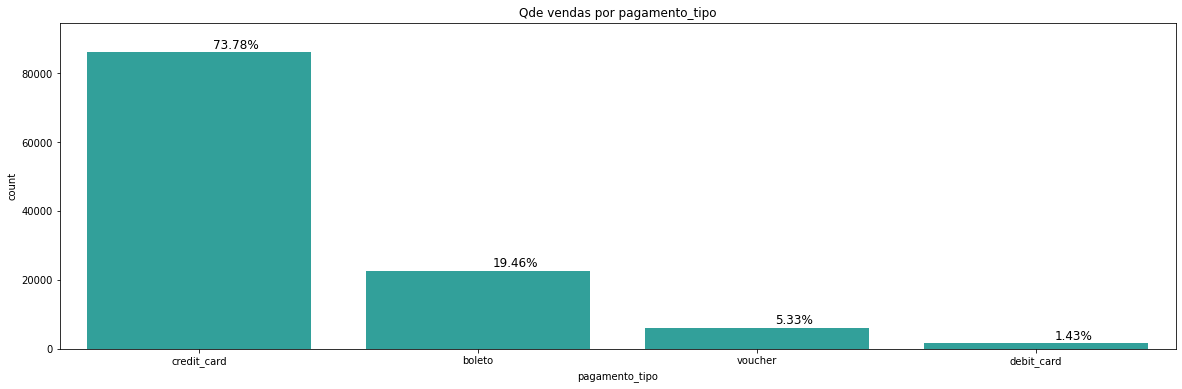

In [ ]:
plot_perc('pagamento_tipo')

[Text(0, 0, 'SP'),
 Text(0, 0, 'PA'),
 Text(0, 0, 'RS'),
 Text(0, 0, 'RJ'),
 Text(0, 0, 'SC'),
 Text(0, 0, 'MG'),
 Text(0, 0, 'MT'),
 Text(0, 0, 'BA'),
 Text(0, 0, 'ES'),
 Text(0, 0, 'PR'),
 Text(0, 0, 'MS'),
 Text(0, 0, 'CE'),
 Text(0, 0, 'RN'),
 Text(0, 0, 'TO'),
 Text(0, 0, 'MA'),
 Text(0, 0, 'GO'),
 Text(0, 0, 'PI'),
 Text(0, 0, 'PE'),
 Text(0, 0, 'DF'),
 Text(0, 0, 'PB'),
 Text(0, 0, 'AL'),
 Text(0, 0, 'SE'),
 Text(0, 0, 'RO'),
 Text(0, 0, 'AC'),
 Text(0, 0, 'RR'),
 Text(0, 0, 'AM'),
 Text(0, 0, 'AP')]

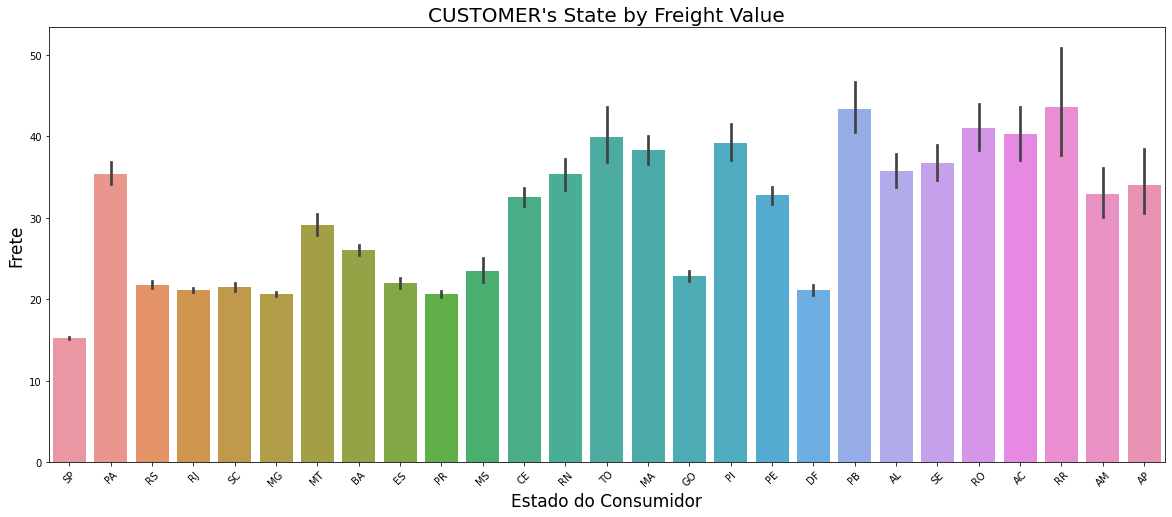

In [ ]:
plt.figure(figsize=(20,8))
g3 = sns.barplot(x='estado_cliente', y='frete',
                 data=df[df['preco'] != -1])
g3.set_title("CUSTOMER's State by Freight Value", fontsize=20)
g3.set_xlabel("Estado do Consumidor", fontsize=17)
g3.set_ylabel("Frete", fontsize=17)
g3.set_xticklabels(g3.get_xticklabels(),rotation=45)

In [ ]:
sudeste = ['SP', 'RJ', 'ES','MG']
nordeste= ['MA', 'PI', 'CE', 'RN', 'PE', 'PB', 'SE', 'AL', 'BA']
norte =  ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC']
centro_oeste = ['MT', 'GO', 'MS' ,'DF' ]
sul = ['SC', 'RS', 'PR']

df.loc[df['estado_cliente'].isin(sudeste), 'Regiao'] = 'Sudeste'
df.loc[df['estado_cliente'].isin(nordeste), 'Regiao'] = 'Nordeste'
df.loc[df['estado_cliente'].isin(norte), 'Regiao'] = 'Nortw'
df.loc[df['estado_cliente'].isin(centro_oeste), 'Regiao'] = 'Centro-Oeste'
df.loc[df['estado_cliente'].isin(sul), 'Regiao'] = 'Sul'

Para criar um mapa de calor, precisamos primeiro definir uma função e então utilizar a função pd.crosstab do pandas. Essa função calcula uma tabulação cruzada simples de dois (ou mais) fatores. Por padrão, calcula uma tabela de frequência dos fatores, a menos que uma matriz de valores e uma função de agregação sejam passadas:

In [ ]:
def cross_heatmap(df, cols, normalize=False, values=None, aggfunc=None):
    temp = cols
    cm = sns.light_palette("green", as_cmap=True)
    return pd.crosstab(df[temp[0]], df[temp[1]],
                       normalize=normalize, values=values, aggfunc=aggfunc).style.background_gradient(cmap = cm)

Para isso, utilizamos os parâmetros “index” (valores para agregar nas linhas), “columns” (valores para agregar nas colunas), “normalize” (normaliza os valores dividindo todos pela soma de valores), “values” (Matriz de valores a serem agregados de acordo com os fatores) e “aggfunc” (para agregar os dados). Tente brincar com esses valores para observar como isso muda.

In [ ]:
cross_heatmap(df[df['preco'] != -1], ['estado_vendedor', 'Regiao'], 
              values=df[df['preco'] != -1]['frete'], aggfunc='mean')

Regiao,Centro-Oeste,Nordeste,Nortw,Sudeste,Sul
estado_vendedor,,,,,
AC,nan,nan,nan,32.840000,nan
AM,nan,28.255000,nan,25.290000,nan
BA,29.977381,22.736355,46.290476,33.618110,39.643671
CE,65.456667,29.744054,85.614000,47.044130,51.445556
DF,13.022231,27.532778,58.371935,19.654101,27.076867
ES,36.895833,38.183269,60.022857,28.753852,39.894510
GO,14.573721,33.369841,26.595909,23.764630,30.426667
MA,27.150192,19.453333,28.859000,31.880362,42.660652
MG,26.980406,34.144730,41.923133,21.278114,28.976495


## RFM

**Recência** - há quantos dias foi a última compra do cliente?

**Frequência** - Quantas compras esse cliente realizou? (Fidelidade)

**Monetaridade** - Quanto gastou?

In [ ]:
df_olist = df[['id_unico_cliente', 'id_cliente','horario_pedido','item_id','preco']]

In [ ]:
df_compra = df.groupby('id_unico_cliente')['horario_pedido'].max().reset_index()
df_compra.columns = ['id_unico_cliente', 'data_max_compra']
df_compra.head()

,id_unico_cliente,data_max_compra
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [ ]:
df_compra['recencia'] = (df_compra['data_max_compra'].max() - df_compra['data_max_compra']).dt.days

In [ ]:
df_usuario = pd.merge(df_olist, 
                      df_compra[['id_unico_cliente', 'recencia']], 
                      on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211


## K-means e a Regra do cotovelo

> como definir o número de clusters?

1. Definir os centróides
2. Calcular as distâncias em relação aos centróides
3. Atualização dos centróides (média das distâncias). Repete esta etapa até encontrar a menor distância


> Regra do cotovelo

busca do valor ótimo de inércia.


* a inércia funciona bem em clusters redondos, mas é uma métrica ruim se os clusters são de formato irregular.
* não é uma métrica normalizada, logo, se tiver muitas dimensões teremos problemas, pois as distâncias ficarão infladas.

Coeficiente de silhueta: Essa é uma medida melhor para decidir o número de clusters a serem formulados a partir dos dados.

In [ ]:
df_recencia = df_usuario[['recencia']]
df_recencia.head()

,recencia
0,474
1,298
2,298
3,483
4,211


In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

for i in range(2, 11):
    clusterer = KMeans(n_clusters=i)
    preds = clusterer.fit_predict(df_recencia)
    score = silhouette_score(df_recencia, preds)
    print('Silhueta para ' + str(i) + ' clusters : ' + str(score))

Silhueta para 2 clusters : 0.5987816654977525
Silhueta para 3 clusters : 0.5768597688223587
Silhueta para 4 clusters : 0.558719557210725


KeyboardInterrupt: ignored

In [ ]:
def calcular_wcss(data):
  wcss = []
  for k in range(1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X=data)
    data['clusters'] = kmeans.labels_
    wcss.append(kmeans.inertia_)
  return wcss

In [ ]:
soma_quadrados = calcular_wcss(df_recencia)

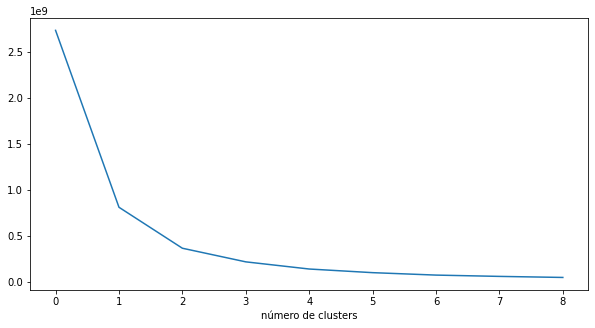

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(soma_quadrados)
plt.xlabel('número de clusters')
plt.show()

# com 4 clusteres atenderia as nossas necessidades?

In [ ]:
import math
def numero_otimo_cluster(wcss):
  x1,y1 = 2,wcss[0]
  x2,y2 = 20,wcss[len(wcss)-1]

  distancia = []
  for i in range(len(wcss)):
    x0 = i + 2
    y0 = wcss[i]
    numerador = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1-y2*x1)
    denominador = math.sqrt((y2-y1) **2 + (x2-x0)**2)
    distancia.append(numerador/denominador)
  return distancia.index(max(distancia)) + 2

In [ ]:
n = numero_otimo_cluster(soma_quadrados)
n

4

## Clusterizando a recência

In [ ]:
kmeans = KMeans(n_clusters=n)
df_usuario['recencia_cluster'] = kmeans.fit_predict(df_recencia)
df_usuario.head()


,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3
1,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,1,112.99,298,0
2,9eae34bbd3a474ec5d07949ca7de67c0,8912fc0c3bbf1e2fbf35819e21706718,2017-11-09 00:50:13,2,112.99,298,0
3,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3
4,23397e992b09769faf5e66f9e171a241,6bc8d08963a135220ed6c6d098831f84,2018-02-03 19:45:40,1,106.99,211,2


In [ ]:
agrupado_por_cluster = df_usuario.groupby('recencia_cluster')['recencia'].mean().reset_index()
agrupado_por_cluster.head()

,recencia_cluster,recencia
0,0,319.957296
1,1,66.405850
2,2,187.293338
3,3,490.622269


In [ ]:
agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by='recencia', ascending=False).reset_index(drop=True)
agrupado_por_cluster_ordenado.head()

,recencia_cluster,recencia
0,3,490.622269
1,0,319.957296
2,2,187.293338
3,1,66.405850


In [ ]:
agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
agrupado_por_cluster_ordenado

,recencia_cluster,recencia,index
0,3,490.622269,0
1,0,319.957296,1
2,2,187.293338,2
3,1,66.405850,3


In [ ]:
juntando_cluster = pd.merge(df_usuario, agrupado_por_cluster_ordenado[['recencia_cluster','index']], on='recencia_cluster' )
juntando_cluster.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_cluster,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,0


In [ ]:
removendo_dados = juntando_cluster.drop(['recencia_cluster'], axis=1)
removendo_dados.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,index
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [ ]:
df_final = removendo_dados.rename(columns={'index': 'recencia_cluster'})
df_final.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,0


In [ ]:
def ordenador_cluster(cluster_nome, target_nom, df):
  agrupado_por_cluster = df.groupby(cluster_nome)[target_nom].mean().reset_index()
  agrupado_por_cluster_ordenado = agrupado_por_cluster.sort_values(by=target_nom, ascending=True).reset_index(drop=True)
  agrupado_por_cluster_ordenado['index'] = agrupado_por_cluster_ordenado.index
  juntando_cluster = pd.merge(df, agrupado_por_cluster_ordenado[[cluster_nome,'index']], on=cluster_nome)
  removendo_dados = juntando_cluster.drop([cluster_nome], axis=1)
  df_final = removendo_dados.rename(columns={'index': cluster_nome})
  return df_final


In [ ]:
df_usuario = ordenador_cluster('recencia_cluster', 'recencia', df_usuario)

In [ ]:
df_usuario.groupby('recencia_cluster')['recencia'].describe()

,count,mean,std,min,25%,50%,75%,max
recencia_cluster,,,,,,,,
0,31588.0,66.405850,35.800016,0.0,33.0,67.0,99.0,126.0
1,33712.0,187.293338,35.169771,127.0,158.0,187.0,218.0,253.0
2,30957.0,319.957296,44.086874,254.0,281.0,313.0,357.0,405.0
3,20324.0,490.622269,59.293154,406.0,444.0,481.0,533.0,728.0


## Clusterizando a frequência

In [ ]:
df_frequencia = df.groupby('id_unico_cliente')['pedido_aprovado'].count().reset_index()
df_frequencia.columns = ['id_unico_cliente','frequencia']
df_frequencia.head()

,id_unico_cliente,frequencia
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [ ]:
df_usuario = pd.merge(df_usuario, df_frequencia, on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_cluster,frequencia
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,1
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,1
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,1


In [ ]:
df_frequencia = df_usuario[['frequencia']]
kmeans = KMeans(n_clusters=n)
df_usuario['frequencia_cluster'] = kmeans.fit_predict(df_frequencia)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_cluster,frequencia,frequencia_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,1,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,1,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,1,0


In [ ]:
#ordenando o cluster de frequencia

df_usuario.groupby('frequencia_cluster')['frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
frequencia_cluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,514.0,24.447471,5.669776,16.0,20.0,24.0,24.0,38.0
2,9422.0,5.848015,2.496369,4.0,4.0,5.0,6.0,15.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


In [ ]:
#Como a pontuação do cliente está errado, mudamos na função, o sort_values para True
df_usuario = ordenador_cluster('frequencia_cluster', 'frequencia', df_usuario)

In [ ]:
df_usuario.groupby('frequencia_cluster')['frequencia'].describe()

,count,mean,std,min,25%,50%,75%,max
frequencia_cluster,,,,,,,,
0,106570.0,1.306343,0.570539,0.0,1.0,1.0,2.0,3.0
1,9422.0,5.848015,2.496369,4.0,4.0,5.0,6.0,15.0
2,514.0,24.447471,5.669776,16.0,20.0,24.0,24.0,38.0
3,75.0,75.000000,0.000000,75.0,75.0,75.0,75.0,75.0


## Clusterizando a receita

In [ ]:
df_receita = df.groupby('id_unico_cliente')['pagamento_valor'].sum().reset_index()
df_receita.columns = ['id_unico_cliente', 'receita']

In [ ]:
df_usuario = pd.merge(df_usuario, df_receita, on='id_unico_cliente')
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_cluster,frequencia,frequencia_cluster,receita
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1,0,146.87
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1,0,140.61
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,1,0,142.05
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,1,0,155.70
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,1,0,148.33


In [ ]:
df_receita = df_usuario[['receita']]
kmeans = KMeans(n_clusters=n)
df_usuario['receita_cluster'] = kmeans.fit_predict(df_receita)
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_cluster,frequencia,frequencia_cluster,receita,receita_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,1,0,148.33,0


In [ ]:
df_usuario = ordenador_cluster('receita_cluster', 'receita', df_usuario)

In [ ]:
df_usuario.head()

,id_unico_cliente,id_cliente,horario_pedido,item_id,preco,recencia,recencia_cluster,frequencia,frequencia_cluster,receita,receita_cluster
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,2017-05-16 15:05:35,1,124.99,474,3,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,f0ac8e5a239118859b1734e1087cbb1f,2017-05-07 20:11:26,1,124.99,483,3,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,fd3a0b1bd209f0e7d420c9c3d1127613,2017-03-23 15:10:17,1,126.99,528,3,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,fbd40c083aa8cddebb5265b2ba6aaf2e,2017-05-16 10:00:49,1,124.99,474,3,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,10558ef4afea173bfb5e2cbe3d5b0bb5,2017-03-18 23:04:36,1,126.99,533,3,1,0,148.33,0


In [ ]:
df_usuario.groupby('receita_cluster')['receita'].describe()

,count,mean,std,min,25%,50%,75%,max
receita_cluster,,,,,,,,
0,114904.0,261.485763,377.283592,9.59,69.90,132.82,270.00,3080.96
1,1478.0,5900.843911,2894.129234,3083.40,3798.75,4875.25,7315.92,16313.60
2,191.0,27358.656911,10032.832924,17069.76,19167.26,25051.89,30186.00,45256.00
3,8.0,109312.640000,0.000000,109312.64,109312.64,109312.64,109312.64,109312.64


In [ ]:
df_usuario.columns

Index(['id_unico_cliente', 'id_cliente', 'horario_pedido', 'item_id', 'preco',
       'recencia', 'recencia_cluster', 'frequencia', 'frequencia_cluster',
       'receita', 'receita_cluster'],
      dtype='object')

In [ ]:
cols = ['id_unico_cliente', 'recencia', 'recencia_cluster', 'frequencia', 'frequencia_cluster',
       'receita', 'receita_cluster']

df_final = df_usuario[cols]
df_final.head()

,id_unico_cliente,recencia,recencia_cluster,frequencia,frequencia_cluster,receita,receita_cluster
0,861eff4711a542e4b93843c6dd7febb0,474,3,1,0,146.87,0
1,3c799d181c34d51f6d44bbbc563024db,483,3,1,0,140.61,0
2,567ab47ca4deb92d46dbf54dce07d0a7,528,3,1,0,142.05,0
3,f40ab89b622248b7ca125af4b486b887,474,3,1,0,155.70,0
4,749943913a9851a39c9baf51877fbab6,533,3,1,0,148.33,0


In [ ]:
df_final['pontuacao'] = (df_usuario['recencia_cluster'] +
                        df_usuario['frequencia_cluster'] +
                        df_usuario['receita_cluster'])
df_final.head()

,id_unico_cliente,recencia,recencia_cluster,frequencia,frequencia_cluster,receita,receita_cluster,pontuacao
0,861eff4711a542e4b93843c6dd7febb0,474,3,1,0,146.87,0,3
1,3c799d181c34d51f6d44bbbc563024db,483,3,1,0,140.61,0,3
2,567ab47ca4deb92d46dbf54dce07d0a7,528,3,1,0,142.05,0,3
3,f40ab89b622248b7ca125af4b486b887,474,3,1,0,155.70,0,3
4,749943913a9851a39c9baf51877fbab6,533,3,1,0,148.33,0,3


In [ ]:
df_final.pontuacao.describe()

count    116581.000000
mean          1.450983
std           1.129811
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: pontuacao, dtype: float64

In [ ]:
df_final['Segmento'] = 'Inativo'
df_final.loc[df_final['pontuacao']>=1,'Segmento'] = 'Business'
df_final.loc[df_final['pontuacao']>=3,'Segmento'] = 'Master'
df_final.loc[df_final['pontuacao']>=5,'Segmento'] = 'Premium'

In [ ]:
def plot_segmento(x,y,data):
    sns.set(palette='muted',color_codes=True,style='whitegrid')
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=x,y=y,hue='Segmento',data=data,size='Segmento',sizes=(50,150),size_order=['Premium','Master','Business','Inativo'])
    plt.show()

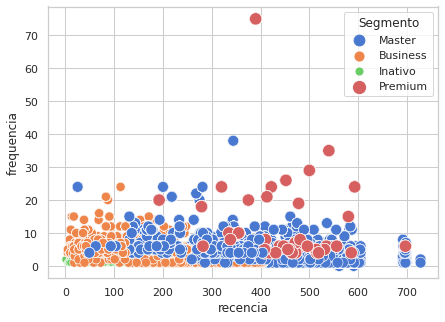

In [ ]:
plot_segmento('recencia','frequencia',df_final)

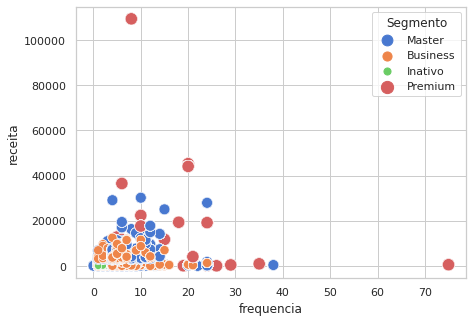

In [ ]:
plot_segmento('frequencia','receita',df_final)

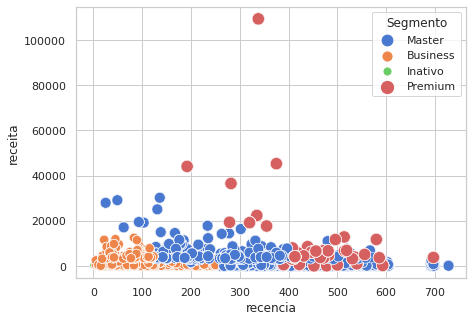

In [ ]:
plot_segmento('recencia','receita',df_final)

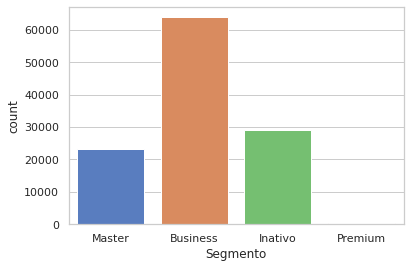

In [ ]:
sns.countplot(df_final['Segmento'])